In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

/Users/Dexter/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.


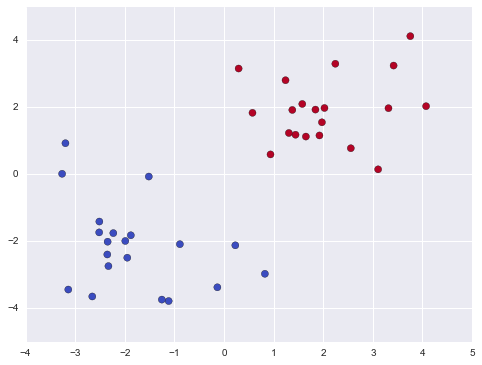

In [2]:
#Data
data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

### Answer:
__(1a)__

In [3]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear', C=100000)  # as we use linear svm we specify a linear kernel (see below what does it mean)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
print "hyperplane line = {0:.3f} * x - {1:.4f}".format(a, clf.intercept_[0]/w[1])

hyperplane line = -1.177 * x - 0.0767


__(1b)__

In [4]:
b = clf.support_vectors_
margin = np.abs(clf.decision_function(b)).mean()
print "margin = {0:.5f}".format(margin)

margin = 1.00016


__(1c)__

In [5]:
print "support vectors = \n{}".format(b)

support vectors = 
[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


__(2)__

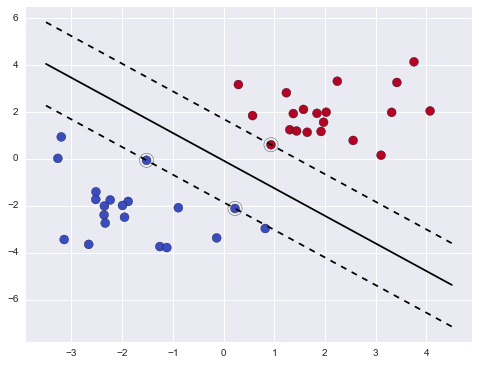

In [6]:
x1 = np.linspace(-3.5, 4.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that go through the
# support vectors
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=80, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')
plt.show()

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


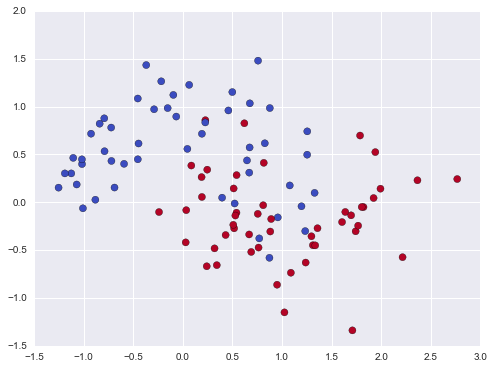

In [7]:
#Data
data2=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

__(1)__

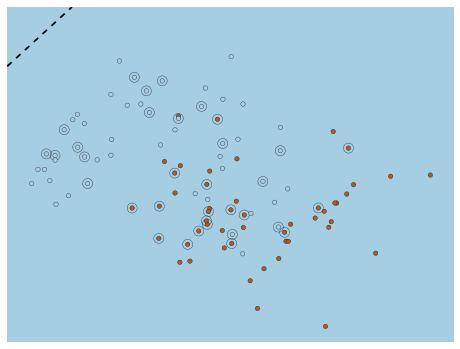

we successfully predict(IS) the 61.3636363636 percent of data
we successfully predict(OS) the 43.4782608696 percent of data


In [8]:
clf = svm.SVC(kernel='linear', C=0.01) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 

clf.fit(X_train_1, Y_train_1)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -1.5
x_max = 3
y_min = -1.5
y_max = 2

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict(IS) the {} percent of data".format(100.0*(clf.predict(X_train_1) == Y_train_1).sum()/len(Y_train_1))
print "we successfully predict(OS) the {} percent of data".format(100.0*(clf.predict(X_vali) == Y_vali).sum()/len(Y_vali))

__(2)__

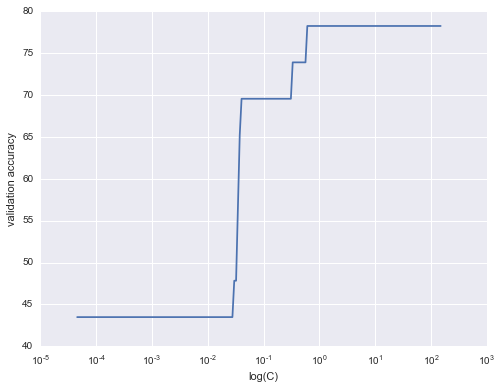

In [9]:
import math
C=[math.exp(i) for i in np.linspace(-10,5,200)]
vali_acc = []
for i in C:
    clf = svm.SVC(kernel='linear',C=i)
    clf.fit(X_train_1, Y_train_1)
    vali_acc.append(100.0*(clf.predict(X_vali) == Y_vali).sum()/len(Y_vali))
    
plt.semilogx(C, vali_acc)
plt.xlabel('log(C)')
plt.ylabel('validation accuracy')
plt.show()

__(3)__

In [10]:
clf = svm.SVC(kernel='linear',C=C[np.argmax(vali_acc)])
clf.fit(X_train, Y_train)
print "we successfully predict(OS) the {} percent of data".format(100.0*(clf.predict(X_test) == Y_test).sum()/len(Y_test))

we successfully predict(OS) the 84.8484848485 percent of data


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


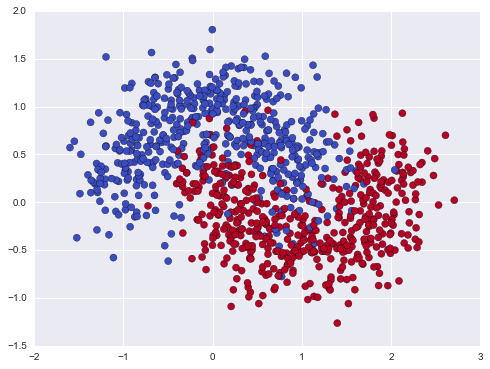

In [11]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

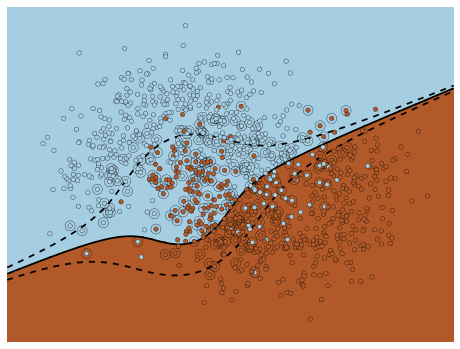

we successfully predict(IS) the 79.0178571429 percent of data
we successfully predict(OS) the 81.0810810811 percent of data


In [12]:
clf = svm.SVC(kernel='poly') #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 

clf.fit(X_train_1, Y_train_1)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -2
x_max = 3
y_min = -1.5
y_max = 2

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict(IS) the {} percent of data".format(100.0*(clf.predict(X_train_1) == Y_train_1).sum()/len(Y_train_1))
print "we successfully predict(OS) the {} percent of data".format(100.0*(clf.predict(X_vali) == Y_vali).sum()/len(Y_vali))

__(2a,b)__

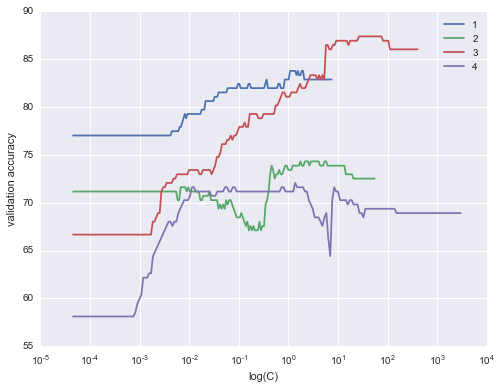

In [13]:
acc_vali=np.zeros((4,200))

for degree in [1,2,3,4]:
    C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]
    for j in range(200):
        c = C[j]
        clf = svm.SVC(kernel='poly',C=c,degree=degree)
        clf.fit(X_train_1, Y_train_1)
        acc_vali[degree-1][j] = 100.*(clf.predict(X_vali) == Y_vali).sum()/len(Y_vali)
    plt.semilogx(C, acc_vali[degree-1], label=degree)
    plt.legend()
    plt.xlabel('log(C)')
    plt.ylabel('validation accuracy')

In [14]:
i, j = np.unravel_index(acc_vali.argmax(), acc_vali.shape)
degree = i + 1
C=[math.exp(i) for i in np.linspace(-10,2*(degree),200)]
print "My optimal degree = {0}, C = {1:.3f}".format(degree, C[j])

My optimal degree = 3, C = 26.215


__(2c)__

In [15]:
clf = svm.SVC(kernel='poly', C=C[j], degree=degree)
clf.fit(X_train, Y_train)
print "we successfully predict(OS) the {} percent of data".format(100.0*(clf.predict(X_test) == Y_test).sum()/len(Y_test))

we successfully predict(OS) the 89.0909090909 percent of data
